In [1]:
# autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys

import pathmagic
from tools.project import proj_dir

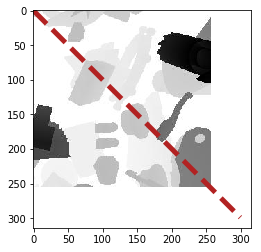

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("/home/kevin/coc.jpg")

x = range(300)
#plt.imshow(img, extent=[0, 400, 0, 300])
plt.imshow(img)
plt.plot(x, x, '--', linewidth=5, color='firebrick')

In [75]:
from blender.lens_tools import *

focal_length = 4.2 * 1e-3
focus_distance = 0.1 #0.1
f_number = 1.7
depth = 0.5
# sensor_size = 5.645 * 1e-3

aperture = focal_length / f_number

signed_coc = calc_signed_coc(focal_length, focus_distance, f_number, depth)
focus_distance_check = calc_focus_distance(focal_length, f_number, signed_coc, depth)
depth_check = calc_depth_from_signed_coc(focal_length, focus_distance, f_number, signed_coc)

print(signed_coc, depth - depth_check, focus_distance - focus_distance_check)

8.665111138401083e-05 -2.220446049250313e-16 -1.3877787807814457e-17


In [98]:
import numpy as np

#foc_dist_min = 0.1
depth_focus_diff = 0.4
focus_multiplier = 4
#depth_max = foc_dist_min + depth_focus_diff

focal_length = 3.2 * 1e-3
f_number = focal_length / aperture

res = calc_focus_distance_for_range(focal_length, f_number, signed_coc, depth_focus_diff)
res2 = calc_focus_distance_for_scale_range(focal_length, f_number, signed_coc, focus_multiplier)

print(res2)
print(np.rad2deg(calc_fov(focal_length, sensor_size)))

(0.07162857142857143, 0.2865142857142857)
82.82660141657894


In [111]:
def get_minmax_coc():
    params = {
        "focal_length_range": [3.2 * 1e-3, 8.2 * 1e-3],
        "focus_range": [0.07, 1.5],
        "depth_range": [0.03, 3]
    }

    coc_min = 999999
    coc_max = 0
    
    params_min, params_max = None, None
    
    for focal_length in np.linspace(*params["focal_length_range"], 50):
        for focus_distance in params["focus_range"]:
            for depth in params["depth_range"]:
                f_number = focal_length / aperture
                coc = calc_signed_coc(focal_length, focus_distance, f_number, depth)
                coc = max(coc, 0)
                
                if coc < coc_min:
                    coc_min = coc
                    params_min = focal_length, focus_distance, depth
                    
                if coc > coc_max:
                    coc_max = coc
                    params_max = focal_length, focus_distance, depth
                
    print(coc_max)
    print("focal_length, focus_distance, depth")
    # print(params_min)
    print(params_max)
    
get_minmax_coc()

0.00032016371597182565
focal_length, focus_distance, depth
(0.008199999999999999, 0.07, 3)


In [28]:
import torch
from net.ddff_net import DDFFNet
from net.ddff_net_har import DDFFNetHar
from tools.tools import deterministic

x = torch.rand([1, 1, 3, 32, 32])
x_enc = torch.rand([1, 3, 32, 32])

deterministic()
net_mod = DDFFNet(1)
out1 = net_mod(x)

deterministic()
net_org = DDFFNetHar(1)
out2 = net_org(x)

print(out1.shape, out2.shape)

print(out1, out2)

print(((out2 - out1)**2).sum())

Seeeeeeeeeeeeeding!!!
Loaded pretrained
Seeeeeeeeeeeeeding!!!
torch.Size([1, 1, 32, 32]) torch.Size([1, 1, 32, 32])
tensor([[[[ 0.0000, -0.0612, -0.0408,  ..., -0.2890,  0.0000, -0.0169],
          [ 0.0000, -0.4580, -0.6605,  ..., -0.3058, -0.5797, -0.1294],
          [-0.1459,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [-0.1848, -0.9130, -0.6197,  ..., -0.2945, -0.3579, -0.9078],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [-0.1987, -0.2348, -0.3417,  ..., -0.1248,  0.0000, -0.3238]]]],
       grad_fn=<MkldnnConvolutionBackward>) tensor([[[[ 0.0000, -0.0612, -0.0408,  ..., -0.2890,  0.0000, -0.0169],
          [ 0.0000, -0.4580, -0.6605,  ..., -0.3058, -0.5797, -0.1294],
          [-0.1459,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [-0.1848, -0.9130, -0.6197,  ..., -0.2945, -0.3579, -0.9078],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [-0.1

In [7]:
net_mod

DDFFNet(
  (encoder): DDFFEncoder(
    (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (conv1_1_bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (conv1_2_bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (conv2_1_bn): BatchNorm2d(128, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (conv2_2_bn): BatchNorm2d(128, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3_1): Conv2d

In [22]:
net_org

DDFFNetHar(
  (autoencoder): DDFFAutoEncoder(
    (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (conv1_1_bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (conv1_2_bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (conv2_1_bn): BatchNorm2d(128, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (conv2_2_bn): BatchNorm2d(128, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3